# Script completo
Este ficheiro irá conter o código criado em *Python* para resolver o problema proposto

## *Imports* estáticos

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definição de significância

In [229]:
alpha = 0.05

## *Leitura do ficheiro base*

In [230]:
dados = pd.read_csv('dados/AIRPOL_data.csv', delimiter=";", header=0)
dados = dados.drop(columns=['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'])

## 4.1.1.
1. Construir um gráfico que permita visualizar os níveis médios do poluente O3 nas diversas regiões de Portugal (**NUTS Code**).
2. Indicar a região com nível médio de O3 mais elevado.

### Filtro dos valores

In [231]:
dados_filtrados4_1_1 = dados.filter(['Country', 'NUTS_Code', 'Air_Pollutant', 'Air_Pollution_Average[ug/m3]'])
dados_o3 = dados_filtrados4_1_1[(dados_filtrados4_1_1['Air_Pollutant']=='O3') & (dados_filtrados4_1_1['Country']=='Portugal')]
dados_o3

,Country,NUTS_Code,Air_Pollutant,Air_Pollution_Average[ug/m3]
39446,Portugal,PT,O3,"94,30"
39447,Portugal,PT,O3,"94,30"
39451,Portugal,PT1,O3,"94,30"
39453,Portugal,PT1,O3,"94,30"
39456,Portugal,PT16,O3,"98,90"
39457,Portugal,PT16,O3,"98,90"
39459,Portugal,PT17,O3,"88,10"
39460,Portugal,PT15,O3,"90,80"
39461,Portugal,PT18,O3,"91,90"
39464,Portugal,PT11,O3,"91,90"


### Obtenção dos níveis médios da poluição e construção do gráfico

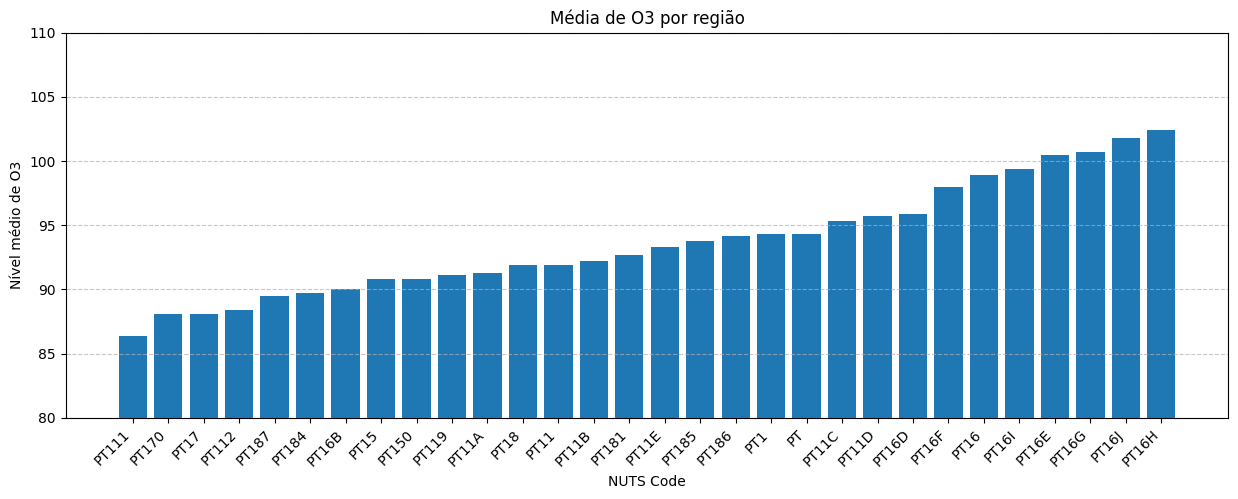

,NUTS_Code,Average Air Pollution [ug/m3]
3,PT111,86.4
23,PT170,88.1
22,PT17,88.1
4,PT112,88.4
29,PT187,89.5
26,PT184,89.7
14,PT16B,90.0
11,PT15,90.8
12,PT150,90.8
5,PT119,91.1


In [232]:
dados_o3 = dados_o3.copy() # Deixamos de ter um 'SettingWithCopyWarning'
dados_o3['Air_Pollution_Average[ug/m3]'] = dados_o3['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
unique_o3_levels = dados_o3.groupby('NUTS_Code')['Air_Pollution_Average[ug/m3]'].mean().reset_index(name='Average Air Pollution [ug/m3]') # Dar um nome à coluna, para a usar depois
unique_o3_levels = unique_o3_levels.sort_values('Average Air Pollution [ug/m3]')

plt.figure(figsize=(15,5))
plt.bar(unique_o3_levels['NUTS_Code'], unique_o3_levels['Average Air Pollution [ug/m3]'])

plt.xlabel("NUTS Code")
plt.ylabel("Nível médio de O3")
plt.title("Média de O3 por região")

plt.xticks(rotation=45, ha="right")
plt.ylim(80,110)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
unique_o3_levels

### Obtenção da área com maior nível de poluição média

In [233]:
biggest_o3_zone = unique_o3_levels.loc[unique_o3_levels['Average Air Pollution [ug/m3]'].idxmax()]
print('Area: '+biggest_o3_zone['NUTS_Code']+'\nAverage Air Pollution: '+biggest_o3_zone['Average Air Pollution [ug/m3]'].astype(str) + ' ug/m3')

Area: PT16H
Average Air Pollution: 102.4 ug/m3


## 4.1.2
Construir um gráfico com o uso de boxplot que permite comparar as distribuições dos níveis médios do poluente PM2.5 em **Portugal**, **Espanha**, **França** e **Itália**.

### Filtro dos valores

In [234]:
dados_filtrados = dados.filter(['Country', 'NUTS_Code', 'Air_Pollutant', 'Air_Pollution_Average[ug/m3]'])
dados_pm25 = dados_filtrados[dados_filtrados['Air_Pollutant'] == 'PM2.5']
dados_paises = dados_pm25[dados_pm25['Country'].isin(['Portugal', 'Spain', 'France', 'Italy'])]
dados_paises_filtrados = dados_paises.filter(['Country', 'Air_Pollution_Average[ug/m3]'])
dados_paises_filtrados

,Country,Air_Pollution_Average[ug/m3]
1141,France,"6,20"
1148,France,"4,50"
1149,France,"5,20"
1157,France,"4,50"
1158,France,"4,50"
...,...,...
47743,Italy,"11,70"
47763,Italy,"11,70"
47780,Italy,"11,70"
47787,Italy,"11,70"


### Criação de uma dataframe para uma melhor visão dos dados

In [235]:
dados_portugal = dados_paises_filtrados[dados_paises_filtrados['Country'] == 'Portugal']
dados_espanha = dados_paises_filtrados[dados_paises_filtrados['Country'] == 'Spain']
dados_franca = dados_paises_filtrados[dados_paises_filtrados['Country'] == 'France']
dados_italia = dados_paises_filtrados[dados_paises_filtrados['Country'] == 'Italy']

dados_portugal = dados_portugal.copy()
dados_espanha = dados_espanha.copy()
dados_franca = dados_franca.copy()
dados_italia = dados_italia.copy()

dados_portugal.loc[:, 'Air_Pollution_Average[ug/m3]'] = dados_portugal['Air_Pollution_Average[ug/m3]'].str.replace(',', '.')
dados_espanha.loc[:, 'Air_Pollution_Average[ug/m3]'] = dados_espanha['Air_Pollution_Average[ug/m3]'].str.replace(',', '.')
dados_franca.loc[:, 'Air_Pollution_Average[ug/m3]'] = dados_franca['Air_Pollution_Average[ug/m3]'].str.replace(',', '.')
dados_italia.loc[:, 'Air_Pollution_Average[ug/m3]'] = dados_italia['Air_Pollution_Average[ug/m3]'].str.replace(',', '.')

dados_portugal['Air_Pollution_Average[ug/m3]'] = pd.to_numeric(dados_portugal['Air_Pollution_Average[ug/m3]'])
dados_espanha['Air_Pollution_Average[ug/m3]'] = pd.to_numeric(dados_espanha['Air_Pollution_Average[ug/m3]'])
dados_franca['Air_Pollution_Average[ug/m3]'] = pd.to_numeric(dados_franca['Air_Pollution_Average[ug/m3]'])
dados_italia['Air_Pollution_Average[ug/m3]'] = pd.to_numeric(dados_italia['Air_Pollution_Average[ug/m3]'])

resultado = pd.DataFrame({
    'Portugal': dados_portugal['Air_Pollution_Average[ug/m3]'].dropna(),
    'Espanha': dados_espanha['Air_Pollution_Average[ug/m3]'].dropna(),
    'França': dados_franca['Air_Pollution_Average[ug/m3]'].dropna(),
    'Itália': dados_italia['Air_Pollution_Average[ug/m3]'].dropna(),
})

resultado

,Portugal,Espanha,França,Itália
1141,NaN,NaN,6.2,NaN
1148,NaN,NaN,4.5,NaN
1149,NaN,NaN,5.2,NaN
1157,NaN,NaN,4.5,NaN
1158,NaN,NaN,4.5,NaN
...,...,...,...,...
47743,NaN,NaN,NaN,11.7
47763,NaN,NaN,NaN,11.7
47780,NaN,NaN,NaN,11.7
47787,NaN,NaN,NaN,11.7


### Construção do gráfico boxplot

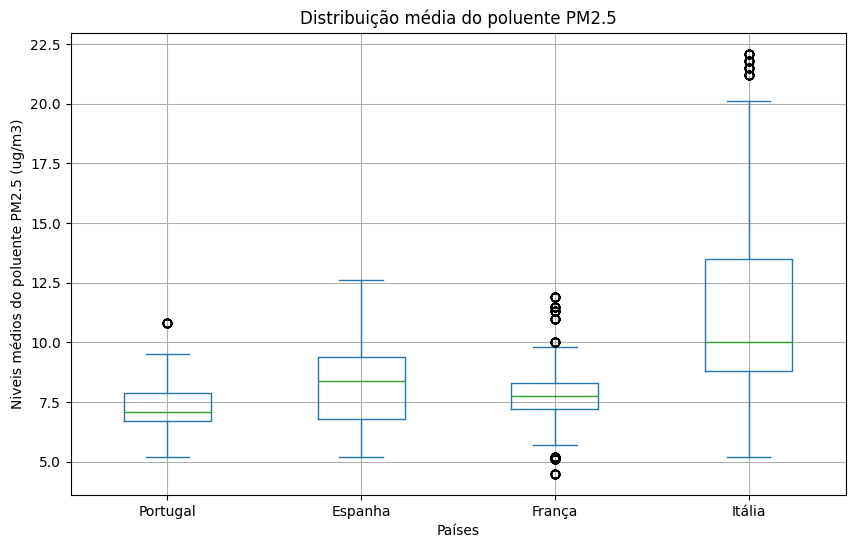

In [236]:
resultado.plot(kind='box', figsize=(10, 6))
plt.title('Distribuição média do poluente PM2.5')
plt.ylabel('Niveis médios do poluente PM2.5 (ug/m3)')
plt.xlabel('Países')
plt.grid()
plt.show()

# 4.1.3.
1. Usando  uma  representação  gráfica adequada,  compare  as  distribuições  do  número  de mortes 
prematuras (Value) em **Portugal**, **Espanha, França e Itália.** 

### Filtro por tipo de morte (outcome) por país.

In [237]:
dados['Value'] = dados['Value'].astype(str).str.replace(',', '.').astype(float)  # Ensure 'Value' is numeric
dados_agrupados = dados[dados['Country'].isin(['Portugal', 'Spain', 'France', 'Italy'])].groupby(['Outcome', 'Country'], as_index=False)['Value'].sum()


## Comparação de Número total de Mortes por tipo em Cada País.

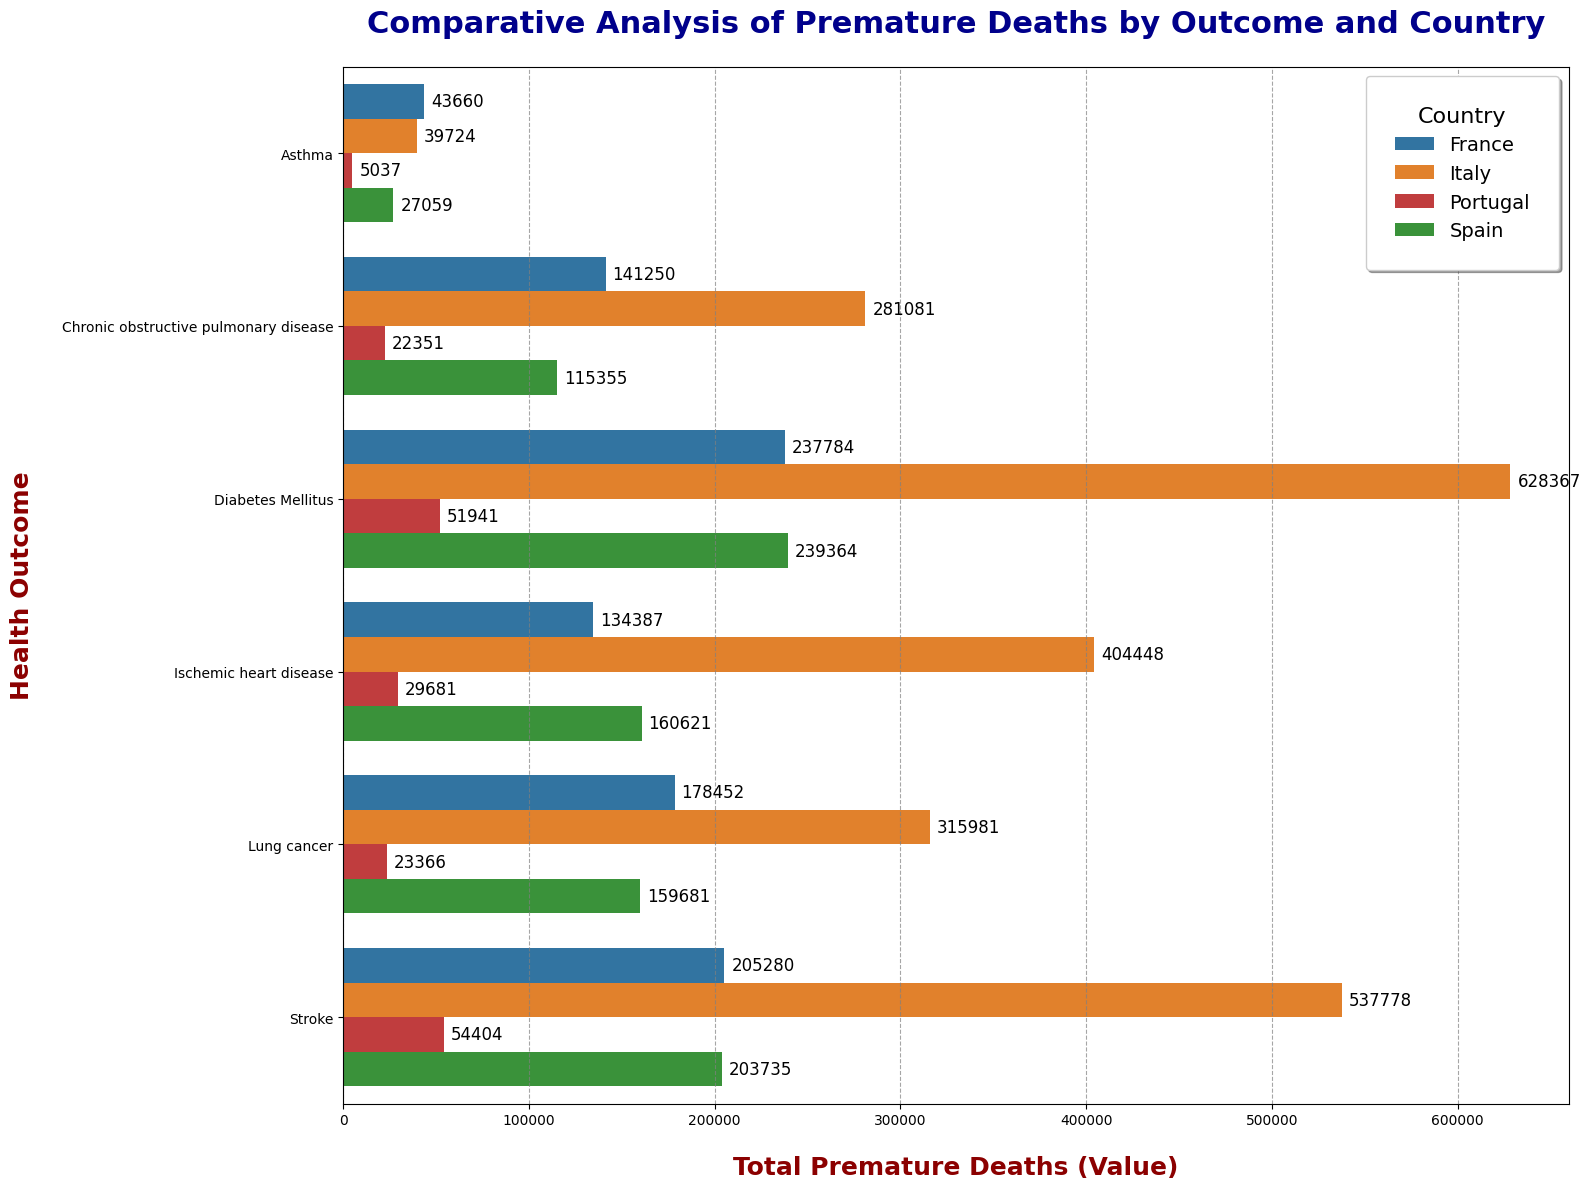

In [238]:
# Pallete de cores
custom_palette = {
    'France': 'tab:blue',   # Set France to blue
    'Italy': 'tab:orange',  # Set Italy to orange
    'Spain': 'tab:green',   # Keep Spain green
    'Portugal': 'tab:red'   # Keep Portugal red
}

plt.figure(figsize=(16, 12))
sns.barplot(
    data=dados_agrupados, 
    y='Outcome', 
    x='Value', 
    hue='Country', 
    palette=custom_palette,  # Use the updated custom palette
    orient='h'
)
plt.title('Comparative Analysis of Premature Deaths by Outcome and Country', 
          fontsize=22, fontweight='bold', color='darkblue', pad=25)
plt.xlabel('Total Premature Deaths (Value)', 
           fontsize=18, fontweight='bold', color='darkred', labelpad=20)
plt.ylabel('Health Outcome', 
           fontsize=18, fontweight='bold', color='darkred', labelpad=20)

plt.legend(
    title='Country', 
    title_fontsize=16, 
    fontsize=14, 
    loc='upper right', 
    frameon=True, 
    shadow=True, 
    borderpad=1.5, 
    fancybox=True
)

# Adicionar linhas horizontais
plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray')

# Adicionar labels para as barras (valores inteiros)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f', fontsize=12, padding=5, color='black')

# Ajustar o layout
plt.tight_layout()
plt.show()


## Pequenas Conclusões Retiradas do Gráfico

- A **Itália** destaca-se claramente por apresentar o maior número de mortes na maioria dos tipos de doenças (exceto asma, embora os valores também sejam elevados).
- A **França** apresenta um número de mortes ligeiramente mais elevado em comparação com os restantes países.
- **Portugal** destaca-se como o país com o menor número de mortes na maioria das doenças.
- Conclui-se também que, independentemente do país, a **asma** é a causa com menos mortes, enquanto a **diabetes** e o **enfarte (stroke)** são os outcomes mais letais.


## 4.1.4
Construir uma tabela que indique os valores da **média**, **quartis**, **desvio padrão**, **assimetria** e **curtose**, do *número de mortes prematuras (Value) associado a STROKE* para cada um dos países: **Espanha**, **França**, **Itália**, **Grécia** (Valores a serem representados com 4 casas decimais).

### Filtro das informações do ficheiro base

In [239]:
dados_stroke = dados[dados['Outcome']=='Stroke']
dados_stroke = dados_stroke.filter(['Country', 'Value'])

num_casas_decimais = 4

dados_espanha = dados_stroke[dados_stroke['Country']=='Spain']
dados_franca = dados_stroke[dados_stroke['Country']=='France']
dados_italia = dados_stroke[dados_stroke['Country']=='Italy']
dados_grecia = dados_stroke[dados_stroke['Country']=='Greece']

### Cálculo das Médias

In [240]:
media_espanha = dados_espanha['Value'].mean()
media_franca = dados_franca['Value'].mean()
media_italia = dados_italia['Value'].mean()
media_grecia = dados_grecia['Value'].mean()

medias = [media_espanha, media_franca, media_italia, media_grecia]
medias

[440.9848484848485, 259.19191919191917, 668.8781094527363, 334.10714285714283]

### Cálculo dos Quartis

In [241]:
quartis_espanha = dados_espanha['Value'].quantile([0.25, 0.5, 0.75]).tolist()
quartis_franca = dados_franca['Value'].quantile([0.25, 0.5, 0.75]).tolist()
quartis_italia = dados_italia['Value'].quantile([0.25, 0.5, 0.75]).tolist()
quartis_grecia = dados_grecia['Value'].quantile([0.25, 0.5, 0.75]).tolist()

quartis = [quartis_espanha, quartis_franca, quartis_italia, quartis_grecia]
quartis

[[13.0, 56.5, 248.75],
 [6.0, 36.5, 150.0],
 [21.0, 78.0, 295.25],
 [7.0, 39.5, 188.5]]

### Cálculo dos Desvios Padrões

In [242]:
desvio_espanha = dados_espanha['Value'].std()
desvio_franca = dados_franca['Value'].std()
desvio_italia = dados_italia['Value'].std()
desvio_grecia = dados_grecia['Value'].std()

desvios = [desvio_espanha, desvio_franca, desvio_italia, desvio_grecia]
desvios

[1654.5759336994204,
 1207.8623482725866,
 3425.7706135199273,
 1321.0479713733419]

### Cálculo das Assimetrias

In [243]:
assimetria_espanha = dados_espanha['Value'].skew()
assimetria_franca = dados_franca['Value'].skew()
assimetria_italia = dados_italia['Value'].skew()
assimetria_grecia = dados_grecia['Value'].skew()

assimetrias = [assimetria_espanha, assimetria_franca, assimetria_italia, assimetria_grecia]
assimetrias

[11.183857863675492, 16.8939001718559, 16.30366502774725, 10.485066745612485]

### Cálculo das Curtoses

In [244]:
curtose_espanha = dados_espanha['Value'].kurtosis()
curtose_franca = dados_franca['Value'].kurtosis()
curtose_italia = dados_italia['Value'].kurtosis()
curtose_grecia = dados_grecia['Value'].kurtosis()

curtoses = [curtose_espanha, curtose_franca, curtose_italia, curtose_grecia]
curtoses

[166.78730359406288, 364.0919044672268, 341.05401792042136, 142.04963586483703]

### Construção da Tabela
*Construção desta tabela foi inspirada pela documentação em [**pandas.pydata.org**](https://pandas.pydata.org/docs/user_guide/style.html)*

In [245]:
df = pd.DataFrame({
    "Médias": medias,
    "Quartis": quartis,
    "Desvios Padrões": desvios,
    "Assimetrias": assimetrias,
    "Curtoses": curtoses
})
df.style \
  .format(precision=num_casas_decimais, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(['Espanha', 'França', 'Itália', 'Grécia'], axis=0)

,MÉDIAS,QUARTIS,DESVIOS PADRÕES,ASSIMETRIAS,CURTOSES
Espanha,"440,9848","[13.0, 56.5, 248.75]","1.654,5759","11,1839","166,7873"
França,"259,1919","[6.0, 36.5, 150.0]","1.207,8623","16,8939","364,0919"
Itália,"668,8781","[21.0, 78.0, 295.25]","3.425,7706","16,3037","341,0540"
Grécia,"334,1071","[7.0, 39.5, 188.5]","1.321,0480","10,4851","142,0496"


## 4.2.1

Selecionar aleatoriamente uma amostra aleatória de 50 registos dos níveis médios de poluição atmosférica em **Portugal**.

### Filtro dos valores

In [246]:
dados_filtrados = dados.filter(['Country','NUTS_Code','Air_Pollution_Average[ug/m3]'])

### Restrição dos dados ao país pretendido e à coluna pretendida

In [247]:
dados_filtrados_portugal = dados_filtrados[dados_filtrados['Country'] == 'Portugal']
dados_filtrados_portugal = dados_filtrados_portugal.drop(columns=['Country', 'NUTS_Code'])
dados_filtrados_portugal['Air_Pollution_Average[ug/m3]'] = dados_filtrados_portugal['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
dados_filtrados_portugal

,Air_Pollution_Average[ug/m3]
1548,5.8
3187,5.2
3188,6.5
3189,6.7
3191,5.2
...,...
46181,7.3
46553,7.3
46554,7.3
47082,7.3


### Seleção aleatória de uma amostra de 50 valores

In [248]:
dados_filtrados_portugal_50 = dados_filtrados_portugal.sample(n=50)
dados_filtrados_portugal_50

,Air_Pollution_Average[ug/m3]
39370,2.8
39345,6.9
3187,5.2
39920,6.5
21829,7.7
39666,3.4
39598,8.8
39417,7.3
35126,7.9
39291,4.0


## 4.2.2.
2. Use esta amostra para testar se o número médio dos níveis de poluição atmosférica em **Portugal** é 
inferior ao número homólogo na **Albânia**. 

# Filtro de Valores

In [249]:
dados_filtrados = dados[dados['Country'].isin(['Portugal', 'Albania'])]
dados_filtrados

,Country,NUTS_Code,Air_Pollutant,Outcome,Affected_Population,Populated_Area[km2],Air_Pollution_Average[ug/m3],Value
0,Albania,AL,NO2,Asthma,"2337443,00","11299,00","5,50",103.0
1,Albania,AL,PM2.5,Asthma,"456076,00","11299,00","11,30",231.0
2,Albania,AL0,NO2,Asthma,"2337443,00","11299,00","5,50",103.0
3,Albania,AL0,PM2.5,Asthma,"456076,00","11299,00","11,30",231.0
4,Albania,AL03,PM2.5,Asthma,"149508,00","4041,50","11,30",69.0
...,...,...,...,...,...,...,...,...
46554,Portugal,PT1,PM2.5,Diabetes Mellitus,"7556343,00","39647,40","7,30",734.0
46603,Albania,AL,PM2.5,Stroke,"1950993,00","11299,00","11,30",825.0
46605,Albania,AL0,PM2.5,Stroke,"1950993,00","11299,00","11,30",825.0
47082,Portugal,PT,PM2.5,Stroke,"7556343,00","39647,40","7,30",972.0


## Dados médios em 50 aleatórios de O3 Albânia

In [250]:
dados_filtrados_albania = dados_filtrados[dados_filtrados['Country'] == 'Albania']
dados_filtrados_albania = dados_filtrados_albania[['Country', 'NUTS_Code', 'Air_Pollution_Average[ug/m3]']]
dados_filtrados_albania['Air_Pollution_Average[ug/m3]'] = dados_filtrados_albania['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)

# Sample 50 random rows
dados_filtrados_albania_50 = dados_filtrados_albania.sample(n=50, random_state=1)  # random_state=1 ensures reproducibility
dados_filtrados_albania_50

,Country,NUTS_Code,Air_Pollution_Average[ug/m3]
422,Albania,AL033,4.5
107,Albania,AL031,11.2
181,Albania,AL034,9.8
214,Albania,AL021,5.2
381,Albania,AL014,11.4
180,Albania,AL033,9.6
36360,Albania,AL032,13.8
190,Albania,AL0,11.3
34,Albania,AL,11.3
392,Albania,AL,5.5


### Retirada de Amostras e Execução de Testes

1. Selecionar amostras aleatórias de 50 valores de média aleatória para cada país.
2. Assumir que ambas as médias da as amostras são normais pelo TLC(Teorema de limite central)
   1. Assumir que Amostras ambas independentes.
   2. Assumir variância desconhecda e diferentes.
      1. Assumimos que Variancias da ambas as amostras são diferentes.
3. Fazer testes paramétricos adequados (Welsh)

# Defição de Hipóteses:

 Ho: media de Portugal inferior a media de Albania
 
 H1: media de Portugal superior  ou igual a media de Albania
### Realização do Teste de Welch:

In [251]:
# Teste-welch para verificar se a média de poluição em Portugal é superior à da Albânia
t_statistic, p_value = stats.ttest_ind(dados_filtrados_portugal_50['Air_Pollution_Average[ug/m3]'], dados_filtrados_albania_50['Air_Pollution_Average[ug/m3]'], equal_var=False, alternative='greater')

print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Conclusão
alpha = 0.05
if p_value < alpha:
    print("Rejeita-se H₀: Portugal tem uma média de poluição superior ou igual à da Albânia.")
else:
    print(" Não há evidência suficiente para rejeitar H₀: logo, não se pode afirmar que Portugal tem uma média de poluição superior ou igual à da Albânia.")



t-statistic: 0.1759542559009484
p-value: 0.43038436879427244
 Não há evidência suficiente para rejeitar H₀: logo, não se pode afirmar que Portugal tem uma média de poluição superior ou igual à da Albânia.


## 4.2.3
1. Selecionar aleatoriamente duas amostras de 20 registos dos níveis médios de poluição atmosférica em Espanha e França.
2. Usar estas amostras para testar se os níveis de poluição atmosférica apresentam diferenças significativas entre os dois países.

### Testar normalidade e testar diferença
Aqui usaremos o **teste de Shapiro-Wilk** para ver estes dois *samples* seguem a distribuição normal. Se alguma das *samples* não seguir a distribuição normal (p-value < significancia), usaremos o teste de **Mann-Whitney-U**. Caso contrário (p_value >= significancia), usaremos o teste de **T-Student**.

O objetivo deste teste é verificar se vamos rejeitar ou não a hipótese nula. Para isto, vamos ver se o p_value resultante do teste escolhido é inferior à significância (rejeitamos a hipótese nula) ou não.

Também rodamos o teste com múltiplas seleções para ver qual dos testes e qual resultado é mais provável.

In [252]:
num_samples = 20
tstudent_vezes = 0
rejeitar_nula_vezes = 0
num_execucoes = 1000
for _ in range(num_execucoes):
    dados_espanha_4_2_3 = dados[dados['Country']=='Spain'].filter(['Air_Pollution_Average[ug/m3]']).sample(n=num_samples)
    dados_franca_4_2_3 = dados[dados['Country']=='France'].filter(['Air_Pollution_Average[ug/m3]']).sample(n=num_samples)
    dados_espanha_4_2_3['Air_Pollution_Average[ug/m3]'] = dados_espanha_4_2_3['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
    dados_franca_4_2_3['Air_Pollution_Average[ug/m3]'] = dados_franca_4_2_3['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)

    _, p_value_espanha = stats.shapiro(dados_espanha_4_2_3)
    _, p_value_franca = stats.shapiro(dados_franca_4_2_3)

    if ((p_value_espanha < alpha) | (p_value_franca < alpha)):
        # Teste Mann-Whitney-U
        _, p_value = stats.mannwhitneyu(dados_espanha_4_2_3, dados_franca_4_2_3)
    else:
        # Teste T-Student 
        _, p_value = stats.ttest_ind(dados_espanha_4_2_3, dados_franca_4_2_3)
        tstudent_vezes += 1

    if(p_value < alpha): rejeitar_nula_vezes += 1

df = pd.DataFrame({
    "Teste T-Student": [tstudent_vezes],
    "Teste Mann-Whitney-U": [num_execucoes - tstudent_vezes]
}, index=["Frequência"])

print(str(df)+"\n\n")

df = pd.DataFrame({
    "Hipótese nula rejeitada": [rejeitar_nula_vezes],
    "Hipótese nula não rejeitada": [num_execucoes - rejeitar_nula_vezes]
}, index=["Frequência"])

print(df)

            Teste T-Student  Teste Mann-Whitney-U
Frequência               21                   979


            Hipótese nula rejeitada  Hipótese nula não rejeitada
Frequência                       73                          927


## 4.2.4

1. Considerar quatro amostras aleatórias de **20** registos dos niveis médios de poluição atmosférica em **Portugal**, **Albânia**, **Espanha** e **França**.
2. Testar a **existência** de diferenças significativas nos níveis médios de poluição atmosférica.

### Filtro dos valores 

In [253]:
dados_filtrados = dados.filter(['Country','NUTS_Code','Air_Pollution_Average[ug/m3]'])
dados_filtrados

,Country,NUTS_Code,Air_Pollution_Average[ug/m3]
0,Albania,AL,"5,50"
1,Albania,AL,"11,30"
2,Albania,AL0,"5,50"
3,Albania,AL0,"11,30"
4,Albania,AL03,"11,30"
...,...,...,...
49135,Turkey,TR822,"9,00"
49136,Turkey,TRB12,"12,40"
49137,Turkey,TRB14,"12,00"
49138,Turkey,TRB21,"11,20"


### Restringir os dados aos países pretendidos

In [254]:
dados_filtrados_portugal = dados_filtrados[dados_filtrados['Country'] == 'Portugal']
dados_filtrados_albania = dados_filtrados[dados_filtrados['Country'] == 'Albania']
dados_filtrados_espanha = dados_filtrados[dados_filtrados['Country'] == 'Spain']
dados_filtrados_franca = dados_filtrados[dados_filtrados['Country'] == 'France']

dados_filtrados_portugal = dados_filtrados_portugal.drop(columns=['Country', 'NUTS_Code'])
dados_filtrados_albania = dados_filtrados_albania.drop(columns=['Country', 'NUTS_Code'])
dados_filtrados_espanha = dados_filtrados_espanha.drop(columns=['Country', 'NUTS_Code'])
dados_filtrados_franca = dados_filtrados_franca.drop(columns=['Country', 'NUTS_Code'])

dados_filtrados_portugal['Air_Pollution_Average[ug/m3]'] = dados_filtrados_portugal['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
dados_filtrados_albania['Air_Pollution_Average[ug/m3]'] = dados_filtrados_albania['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
dados_filtrados_espanha['Air_Pollution_Average[ug/m3]'] = dados_filtrados_espanha['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
dados_filtrados_franca['Air_Pollution_Average[ug/m3]'] = dados_filtrados_franca['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)

### Retirada de Amostras e Execução de Testes

1. Selecionar amostras aleatórias de 20 valores para cada país.
2. Verificar as pré-condições (normalidade e igualdade de variâncias).
3. Realizar os testes estatísticos apropriados (Kruskal ou ANOVA).


In [255]:
diferenca_significativa = 0
diferenca_nao_significativa = 0
normalidade_passou = 0
normalidade_falhou = 0
levene_passou = 0
levene_falhou = 0

# Repetir o processo 1000 vezes
for _ in range(1000):
    # Retirar novas amostras aleatórias
    dados_filtrados_portugal_20 = dados_filtrados_portugal.sample(n=20)
    dados_filtrados_albania_20 = dados_filtrados_albania.sample(n=20)
    dados_filtrados_espanha_20 = dados_filtrados_espanha.sample(n=20)
    dados_filtrados_franca_20 = dados_filtrados_franca.sample(n=20)

    # Teste de Shapiro para determinar a normalidade dos valores
    _, p_value1 = stats.shapiro(dados_filtrados_portugal_20['Air_Pollution_Average[ug/m3]'])
    _, p_value2 = stats.shapiro(dados_filtrados_albania_20['Air_Pollution_Average[ug/m3]'])
    _, p_value3 = stats.shapiro(dados_filtrados_espanha_20['Air_Pollution_Average[ug/m3]'])
    _, p_value4 = stats.shapiro(dados_filtrados_franca_20['Air_Pollution_Average[ug/m3]'])

    if ((p_value1 < 0.05) | (p_value2 < 0.05) | (p_value3 < 0.05) | (p_value4 < 0.05)):
        normalidade_falhou += 1
        # Teste de Kruskal
        _, p_value = stats.kruskal(
            dados_filtrados_portugal_20['Air_Pollution_Average[ug/m3]'],
            dados_filtrados_albania_20['Air_Pollution_Average[ug/m3]'],
            dados_filtrados_espanha_20['Air_Pollution_Average[ug/m3]'],
            dados_filtrados_franca_20['Air_Pollution_Average[ug/m3]']
        )
    else:
        normalidade_passou += 1
        # Teste de Levene para igualdade de variâncias
        _, p_value_levene = stats.levene(
            dados_filtrados_portugal_20['Air_Pollution_Average[ug/m3]'],
            dados_filtrados_albania_20['Air_Pollution_Average[ug/m3]'],
            dados_filtrados_espanha_20['Air_Pollution_Average[ug/m3]'],
            dados_filtrados_franca_20['Air_Pollution_Average[ug/m3]']
        )
        if p_value_levene < 0.05:
            levene_falhou += 1
            # Teste de Kruskal
            _, p_value = stats.kruskal(
                dados_filtrados_portugal_20['Air_Pollution_Average[ug/m3]'],
                dados_filtrados_albania_20['Air_Pollution_Average[ug/m3]'],
                dados_filtrados_espanha_20['Air_Pollution_Average[ug/m3]'],
                dados_filtrados_franca_20['Air_Pollution_Average[ug/m3]']
            )
        else:
            levene_passou += 1
            # Teste ANOVA
            _, p_value = stats.f_oneway(
                dados_filtrados_portugal_20['Air_Pollution_Average[ug/m3]'],
                dados_filtrados_albania_20['Air_Pollution_Average[ug/m3]'],
                dados_filtrados_espanha_20['Air_Pollution_Average[ug/m3]'],
                dados_filtrados_franca_20['Air_Pollution_Average[ug/m3]']
            )

    # Verificar se há diferença significativa
    if p_value < 0.05:
        diferenca_significativa += 1
    else:
        diferenca_nao_significativa += 1

# Criar uma tabela com os resultados
resultados = pd.DataFrame({
    'Resultado': ['Diferença Significativa', 'Não Significativa', 'Normalidade Passou', 'Normalidade Falhou', 'Levene Passou', 'Levene Falhou'],
    'Frequência': [diferenca_significativa, diferenca_nao_significativa, normalidade_passou, normalidade_falhou, levene_passou, levene_falhou]
})

# Exibir a tabela
resultados

,Resultado,Frequência
0,Diferença Significativa,676
1,Não Significativa,324
2,Normalidade Passou,0
3,Normalidade Falhou,1000
4,Levene Passou,0
5,Levene Falhou,0


# 4.3.1.
1. Usando  uma  representação  gráfica adequada,  compare  as  distribuições  do  número  de mortes. 

prematuras (Value) em **Portugal**, **Espanha, França e Itália.** 

### Filtro dos valores 

In [256]:
filtered_pm25 = dados[(dados['Air_Pollutant'] == 'PM2.5') & (dados['Country'].isin(['Portugal', 'France', 'Spain', 'Italy']))]
print(filtered_pm25[['Country', 'Air_Pollution_Average[ug/m3]']])

      Country Air_Pollution_Average[ug/m3]
1141   France                         6,20
1148   France                         4,50
1149   France                         5,20
1157   France                         4,50
1158   France                         4,50
...       ...                          ...
47743   Italy                        11,70
47763   Italy                        11,70
47780   Italy                        11,70
47787   Italy                        11,70
47792   Italy                        11,70

[6714 rows x 2 columns]


# Encontrar primeiro País com menor número de amostras

In [257]:
min_length = min(len(filtered_pm25[filtered_pm25['Country'] == 'Portugal']), len(filtered_pm25[filtered_pm25['Country'] == 'France']), len(filtered_pm25[filtered_pm25['Country'] == 'Spain']), len(filtered_pm25[filtered_pm25['Country'] == 'Italy']))

# Filtro por cada País.

In [258]:
portugal = filtered_pm25[filtered_pm25['Country'] == 'Portugal']['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
spain = filtered_pm25[filtered_pm25['Country'] == 'Spain']['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
france = filtered_pm25[filtered_pm25['Country'] == 'France']['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
italy = filtered_pm25[filtered_pm25['Country'] == 'Italy']['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)


# Retirada de n-minlenght amostras de todos os Países.

In [259]:

sampled_portugal = portugal.sample(n=min_length, random_state=42).reset_index(drop=True)
sampled_spain = spain.sample(n=min_length, random_state=42).reset_index(drop=True)
sampled_france = france.sample(n=min_length, random_state=42).reset_index(drop=True)
sampled_italy = italy.sample(n=min_length, random_state=42).reset_index(drop=True)

# Tabela de Correlação

In [260]:

df_corr_sampled = pd.concat([sampled_portugal, sampled_spain, sampled_france, sampled_italy], axis=1)
df_corr_sampled.columns = ['Portugal', 'Spain', 'France', 'Italy']

correlation_sampled = df_corr_sampled.corr().round(3)
print(correlation_sampled)



          Portugal  Spain  France  Italy
Portugal     1.000 -0.058  -0.040  0.001
Spain       -0.058  1.000  -0.002  0.000
France      -0.040 -0.002   1.000 -0.036
Italy        0.001  0.000  -0.036  1.000


## Conclusão da Matriz de Correlação

A matriz evidencia correlações **muito fracas** entre os países no que diz respeito aos níveis médios de poluição por PM2.5:

- A **maior correlação** observada é entre **Portugal e Espanha** (r = -0.001), ainda assim considerada **muito fraca** e negativa.
- As restantes correlações encontram-se muito próximas de zero, o que sugere que **não existe relação linear significativa** entre os níveis de poluição dos diferentes países.
- Estes resultados indicam que os valores de PM2.5 **variam de forma independente** entre **Portugal**, **Espanha**, **França** e **Itália**.


## 4.3.2
Relativamente aos dados da **Alemanha** e do poluente **PM2.5**:
1. Determinar o modelo de regressão linear
2. Verificar as condições sobre os resíduos
3. Verificar se existe colinearidade
4. Comentar o modelo obtido, tendo em conta todas as características relevantes para a qualidade do modelo
5. Estimar o número de mortes para regiões com **NUTS Code**: **DE131**,**DE132**,**DE133**,**DE134**,**DE135**,**DE136**,**DE137**,**DE138** e **DE139** e comparar com os valores reais

### Filtro dos dados

In [261]:
dados_alemanha = dados[(dados['Country']=='Germany') & (dados['Air_Pollutant']=='PM2.5')]
dados_alemanha = dados_alemanha.filter(['NUTS_Code', # Pedido em e)
                                         'Value', # Y - Número de mortes prematuras
                                         'Populated_Area[km2]', # X2 - Área da região afetada
                                         'Air_Pollution_Average[ug/m3]' # X1 - Nível médio de poluição
                                         ])
dados_alemanha['Value'] = dados_alemanha['Value'].astype(str).str.replace(',', '.').astype(float)
dados_alemanha['Populated_Area[km2]'] = dados_alemanha['Populated_Area[km2]'].str.replace(',', '.').astype(float)
dados_alemanha['Air_Pollution_Average[ug/m3]'] = dados_alemanha['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
dados_alemanha

,NUTS_Code,Value,Populated_Area[km2],Air_Pollution_Average[ug/m3]
1262,DE,3115.0,213783.4,8.4
1268,DE1,343.0,22303.3,7.5
2868,DE11,140.0,6663.3,8.2
2869,DE111,24.0,191.5,9.3
2871,DE112,12.0,383.9,8.1
...,...,...,...,...
47364,DEG0K,4.0,553.4,7.7
47478,DEG0L,6.0,570.0,8.4
47706,DEG0M,6.0,429.7,9.0
47754,DEG0N,2.0,57.4,8.1


### Determinação do modelo de regressão linear

In [262]:
X = dados_alemanha[['Air_Pollution_Average[ug/m3]', 'Populated_Area[km2]']]
Xc = sm.add_constant(X)
y = dados_alemanha['Value']
modelo=sm.OLS(y,Xc)
resultados=modelo.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     2622.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:30:24   Log-Likelihood:                -70030.
No. Observations:                8208   AIC:                         1.401e+05
Df Residuals:                    8205   BIC:                         1.401e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -443.7988    119.109     -3.726      0.000    -677.282    -210.316
Air_Pollution_Average[ug/m3]    52.1364     13.840      3.767      0.000      25.007      79.266
Populated_Area[km2]              0.0928      0.001     72.371      0.000       0.090       0.095
==============================================================================
Omnibus:                    20108.717   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        742457869.753
Skew:                          25.325   Prob(JB):                         0.00
Kurtosis:                    1475.537   Cond. No.                     9.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Verificar resíduos

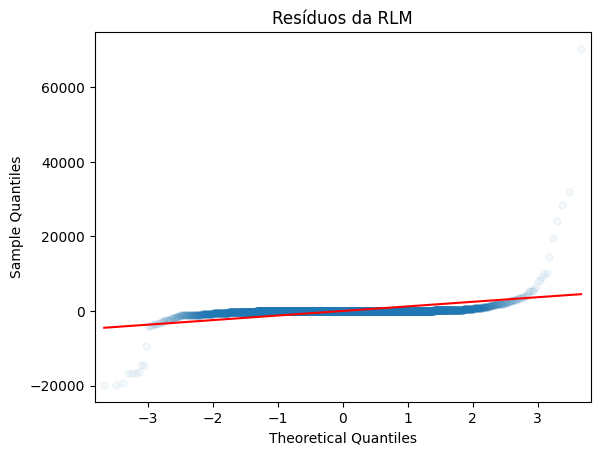

In [263]:
residuos = resultados.resid
sm.qqplot(residuos, line='s', markersize=5, alpha=alpha)
plt.title('Resíduos da RLM')
plt.show()

### Verificar colinearidade

In [264]:
vif_res = pd.DataFrame()
vif_res["variaveis"]=X.columns
vif_res["VIF"]=[variance_inflation_factor(X.values,i)
                for i in range(len(X.columns))]
vif_res

,variaveis,VIF
0,Air_Pollution_Average[ug/m3],1.030255
1,Populated_Area[km2],1.030255


Com isto, concluímos que não há colinearidade significativa entre as variáveis independentes (VIF ≈ 1.03 ≈ 1)
### Comentar o modelo obtido tendo em conta todas as características relevantes para a qualidade do modelo
Visto que os valores de R ao quadrado e R ao quadrado ajustado são baixos (0.390), podemos concluir que a qualidade do modelo não é a mais desejada. Isto deve-se ao facto que o número de mortes devido ao poluente **PM2.5** depende de outros fatores, como o resultado da poluição (**Outcome**).
### Estimar o número de mortes para as regiões previamente indicadas e comparar com os valores reais
Aqui, iremos usar o modelo de regressão linear para, com cada uma das regiões pedidas, comparar o valor estimado com o valor real (média de todos os valores).

In [265]:
regioes=['DE131','DE132','DE133','DE134','DE135','DE136','DE137','DE138','DE139']
medias = []
estimativas = []
diferencas = []

const = resultados.params.iloc[0]
coef_poluicao = resultados.params.iloc[1]
coef_area = resultados.params.iloc[2]

for regiao in regioes:
    # Nós sabemos que num dado NUTS Code a Populated Area e a Air Pollution Average nunca mudam, independente do poluente, número de mortes prematuras, etc.
    area = dados_alemanha[dados_alemanha['NUTS_Code']==regiao]['Populated_Area[km2]'].astype(float).iloc[0]
    poluicao = dados_alemanha[dados_alemanha['NUTS_Code']==regiao]['Air_Pollution_Average[ug/m3]'].astype(float).iloc[0]

    media = dados_alemanha[dados_alemanha['NUTS_Code']==regiao]['Value'].astype(float).mean()
    medias.append(media)

    estimativa = const + coef_poluicao * poluicao + coef_area * area
    estimativas.append(estimativa)

    diferencas.append(abs(media-estimativa))

df = pd.DataFrame({
    "Média Real": medias,
    "Estimativa": estimativas,
    "Diferença": diferencas
})
df.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(regioes, axis=0)

,MÉDIA REAL,ESTIMATIVA,DIFERENÇA
DE131,"37,722","-32,342","70,064"
DE132,"42,556","-30,722","73,278"
DE133,"29,556","-29,688","59,244"
DE134,"85,500","60,325","25,175"
DE135,"18,056","-64,714","82,770"
DE136,"24,278","-86,971","111,248"
DE137,"16,722","-83,798","100,521"
DE138,"50,944","-4,505","55,449"
DE139,"41,833","-35,558","77,391"
